# Finding the best-fit line using Gradient Descent!!

In [1]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

In [2]:
data_src = pd.read_csv("ADRvsRating.csv") #data setw
data_src.head()

,ADR,Rating
0,85.0,117.0
1,83.5,110.0
2,78.2,102.0
3,68.1,97.0
4,66.3,86.0


In [3]:
data = array(data_src) #array(data_src[['plasma_glucose_concentration', 'class']].copy())

In [4]:
data[1,1]

110.0

In [5]:
def error_function(data, m, b):
    N = len(data)
    total_error = 0
    for i in range(0, len(data)):
        x_ = data[i,0]
        y_ = data[i, 1]
        current_y = (m*x_)+b
        total_error += (y_ - current_y)**2
    
    return total_error/float(len(data))

In [6]:
def step_function(m, b, data, lr):
    b_gra = 0
    m_gra = 0
    N  = float(len(data))
    
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        
        b_gra += -(2/N)*(y - ((m*x) + b))
        m_gra += -(2/N)*x*(y - ((m*x) + b))
    
    new_b = b - (lr*b_gra)
    new_m = m - (lr*m_gra)
    
    return [new_b, new_m]

In [7]:
def count_gradient(m, b, data, lr, iterations):
    new_m = m
    new_b = b
    for i in range(0, iterations):
        new_m, new_b = step_function(new_m, new_b, data, lr)
    return [new_b, new_m]

In [8]:
initial_m = 0
initial_b = 0
learning_rate = 0.0001
iterations = 1000

print("Error at start : " ,error_function(data, initial_m, initial_b))

print("prrrrooooceessssss Runnnnnning.....")

[b,m] = count_gradient(initial_m, initial_b, data, learning_rate, iterations)

print(b, m)

Error at start :  12515.672
prrrrooooceessssss Runnnnnning.....
1.3975250967 1.39732662383


In [9]:
print("current error : ",error_function(data, m, b) )

current error :  270.819882584


# Now the Plottings

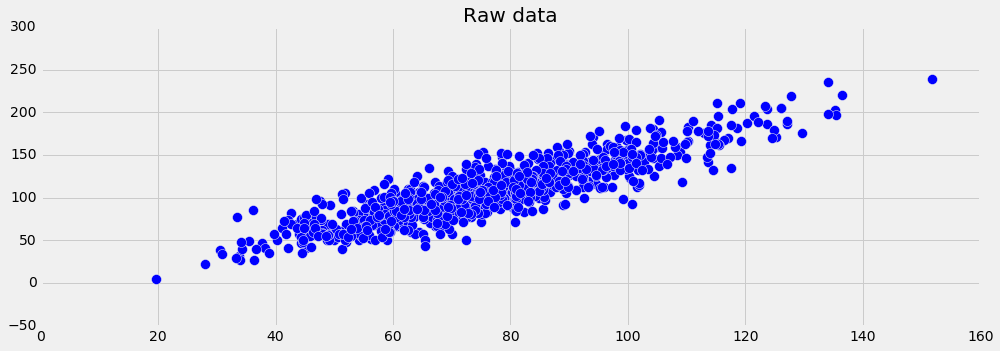

In [10]:
##the raw data
from matplotlib import style
style.use("fivethirtyeight")
plt.figure(figsize=(15,5))
plt.title("Raw data")
plt.scatter(data[:, 0], data[:, 1], c='b', s=100)
plt.show()

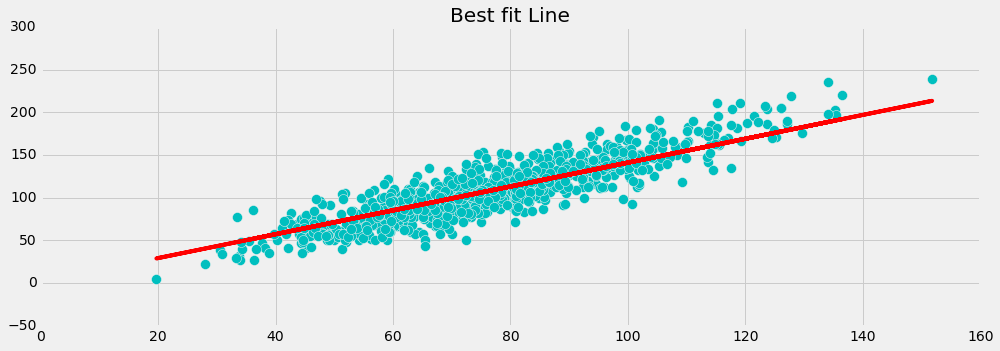

In [11]:
#The best fit line!!

style.use("fivethirtyeight")
plt.figure(figsize=(15,5))
plt.title("Best fit Line")
plt.scatter(data[:, 0], data[:, 1], c='c', s=100)
plt.plot(data[:,0], m*data[:, 0]+b, c='r' )
plt.show()